## # Machine Learning - Hierarichal Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Step-01: Import load_iris from sklearn.datasets 

In [2]:
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris()

In [4]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
x = pd.DataFrame(dataset.data, columns = dataset.feature_names)
y = dataset.target

In [8]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
print("x.head(): \n\n {} \n" .format(x.head()))
print("x.shape: {} \n" .format(x.shape))

x.head(): 

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2 

x.shape: (150, 4) 



In [10]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
print("y: \n\n {} \n" .format(y))
print("y.shape: {} \n" .format(y.shape))

y: 

 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2] 

y.shape: (150,) 



### Step-02: Import train_test_split from sklearn.model_selection

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 100)

In [14]:
x_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
23,5.1,3.3,1.7,0.5
35,5.0,3.2,1.2,0.2
54,6.5,2.8,4.6,1.5
131,7.9,3.8,6.4,2.0
127,6.1,3.0,4.9,1.8
...,...,...,...,...
87,6.3,2.3,4.4,1.3
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
24,4.8,3.4,1.9,0.2


In [15]:
print("x_train.head(): \n\n {} \n" .format(x_train.head()))
print("x_train.shape: {}" .format(x_train.shape))

x_train.head(): 

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
23                 5.1               3.3                1.7               0.5
35                 5.0               3.2                1.2               0.2
54                 6.5               2.8                4.6               1.5
131                7.9               3.8                6.4               2.0
127                6.1               3.0                4.9               1.8 

x_train.shape: (100, 4)


In [17]:
x_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
128,6.4,2.8,5.6,2.1
11,4.8,3.4,1.6,0.2
118,7.7,2.6,6.9,2.3
15,5.7,4.4,1.5,0.4
123,6.3,2.7,4.9,1.8


In [18]:
print("x_test.head(): \n\n {} \n" .format(x_test.head()))
print("x_test.shape: {}" .format(x_test.shape))

x_test.head(): 

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
128                6.4               2.8                5.6               2.1
11                 4.8               3.4                1.6               0.2
118                7.7               2.6                6.9               2.3
15                 5.7               4.4                1.5               0.4
123                6.3               2.7                4.9               1.8 

x_test.shape: (50, 4)


In [19]:
y_train

array([0, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 2, 2, 0, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0,
       1, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 0, 2, 2, 0, 1,
       1, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0,
       0, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 0])

In [21]:
print("y_train: \n\n {} \n" .format(y_train))
print("y_train.shape: {}" .format(y_train.shape))

y_train: 

 [0 0 1 2 2 1 2 1 2 2 1 0 2 2 2 0 0 2 0 0 0 1 2 2 2 0 1 1 0 1 1 2 0 1 1 1 1
 1 1 2 2 0 1 0 1 2 2 2 1 0 0 0 0 2 0 0 1 0 2 1 2 0 2 2 0 1 1 1 2 1 1 0 0 0
 2 1 1 0 2 2 2 1 1 1 1 2 2 0 0 1 1 1 1 2 1 1 2 1 0 0] 

y_train.shape: (100,)


In [22]:
y_test

array([2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 0, 1, 2, 2,
       0, 0, 0, 0, 1, 0])

In [23]:
print("y_test: \n\n {} \n" .format(y_test))
print("y_test.shape: {}" .format(y_test.shape))

y_test: 

 [2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 1 2 2 2 0 2 0 1 2 1 0 1 2 1 1 2 0 0 1 0
 1 2 2 0 1 2 2 0 0 0 0 1 0] 

y_test.shape: (50,)


### Step-03: Import StandardScaler from sklearn.preprocessing

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
standard_scaler = StandardScaler()

In [26]:
standard_scaler

StandardScaler()

In [27]:
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)

In [28]:
x_train

array([[-0.91606933,  0.5957364 , -1.2517454 , -0.99807655],
       [-1.04053528,  0.35648483, -1.54696837, -1.41394178],
       [ 0.82645386, -0.60052143,  0.46054784,  0.38814088],
       [ 2.56897705,  1.79199424,  1.52335053,  1.0812496 ],
       [ 0.32859009, -0.1220183 ,  0.63768162,  0.80400611],
       [-0.54267151, -0.1220183 ,  0.40150324,  0.38814088],
       [ 0.70198791, -0.839773  ,  0.87386   ,  0.94262785],
       [-0.16927368, -0.36126987,  0.22436946,  0.11089739],
       [ 2.32004516,  1.79199424,  1.70048432,  1.35849308],
       [ 0.82645386,  0.35648483,  0.75577081,  1.0812496 ],
       [-0.04480774, -0.839773  ,  0.04723568, -0.02772435],
       [-1.53839905,  1.3134911 , -1.66505756, -1.41394178],
       [ 1.32431763,  0.11723327,  0.93290459,  1.21987134],
       [ 1.07538574,  0.5957364 ,  1.11003837,  1.21987134],
       [ 0.57752197, -0.60052143,  0.75577081,  0.38814088],
       [-0.41820557,  2.7490005 , -1.42887918, -1.41394178],
       [-1.78733093,  0.

In [29]:
x_test

array([[ 0.70198791, -0.60052143,  1.05099378,  1.21987134],
       [-1.28946716,  0.83498797, -1.31078999, -1.41394178],
       [ 2.32004516, -1.07902457,  1.81857351,  1.49711483],
       [-0.16927368,  3.22750364, -1.36983459, -1.13669829],
       [ 0.57752197, -0.839773  ,  0.63768162,  0.80400611],
       [ 2.32004516, -0.1220183 ,  1.34621675,  1.49711483],
       [-0.79160339,  2.50974894, -1.36983459, -1.55256352],
       [-1.16500122, -0.1220183 , -1.42887918, -1.41394178],
       [ 0.82645386, -0.1220183 ,  0.99194918,  0.80400611],
       [-1.28946716, -0.1220183 , -1.42887918, -1.27532004],
       [-1.04053528,  1.07423953, -1.48792378, -1.27532004],
       [ 0.70198791,  0.35648483,  0.87386   ,  1.49711483],
       [-1.04053528,  0.83498797, -1.31078999, -1.13669829],
       [-0.79160339,  0.83498797, -1.42887918, -1.41394178],
       [ 1.07538574, -0.1220183 ,  0.8148154 ,  1.49711483],
       [ 0.45305603, -0.36126987,  0.28341405,  0.11089739],
       [ 0.20412415, -2.

### Step-04: Import PCA from sklearn.decomposition

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca = PCA(n_components = 2)

In [33]:
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [34]:
x_train

array([[ 1.92810952,  0.11720672],
       [ 2.3396654 , -0.16921336],
       [-1.07230939, -0.18945175],
       [-2.36256666,  2.74358318],
       [-1.03236861,  0.05804704],
       [-0.2090696 , -0.3154783 ],
       [-1.62865751, -0.43512783],
       [-0.20167206, -0.39172522],
       [-2.49628608,  2.65277787],
       [-1.39086922,  0.7085655 ],
       [-0.20757625, -0.78388657],
       [ 2.91412277,  0.49710447],
       [-1.89193313,  0.70161137],
       [-1.74304415,  1.03855248],
       [-1.11723155, -0.28676521],
       [ 2.57369583,  2.26850916],
       [ 2.68908788, -0.47439145],
       [-1.17548025, -0.74314257],
       [ 2.18901324,  1.57450595],
       [ 2.17203624,  0.74105374],
       [ 2.07235341,  0.50558587],
       [-1.24510717,  0.67168585],
       [-1.9155721 ,  0.28743793],
       [-2.05897837,  1.055351  ],
       [-1.20781144, -0.82442399],
       [ 2.29150891,  1.12806991],
       [-0.42277798,  0.86713633],
       [-0.74513992,  0.39120595],
       [ 2.42959492,

In [35]:
x_test

array([[-1.82805875, -0.20581908],
       [ 2.45396946,  0.1686733 ],
       [-3.39228723,  0.04199453],
       [ 2.37778262,  2.81604086],
       [-1.34733301, -0.49413026],
       [-2.86632524,  0.90672149],
       [ 2.74777752,  1.89412042],
       [ 2.20985549, -0.65448854],
       [-1.4958831 ,  0.26780276],
       [ 2.19487317, -0.70130952],
       [ 2.41305886,  0.49015034],
       [-1.6329885 ,  0.67203488],
       [ 2.16799988,  0.27911377],
       [ 2.26713437,  0.37086463],
       [-1.91504857,  0.38800548],
       [-0.55626315, -0.13567664],
       [-0.52379976, -1.77966326],
       [-1.37197738,  0.3609166 ],
       [-2.96152542,  0.46365023],
       [-1.92483747,  0.43346347],
       [-1.99217507,  1.06582044],
       [ 1.94657987,  0.48225066],
       [-1.58554279, -0.92513076],
       [ 2.3933294 , -0.31849298],
       [-0.12523152, -1.32627309],
       [-0.97353599, -0.04210308],
       [-0.86351593,  0.29162381],
       [ 2.03537713,  0.4757425 ],
       [-0.61393871,

In [37]:
pca.components_

array([[-0.5142068 ,  0.26048166, -0.58574245, -0.56977754],
       [ 0.40991621,  0.91147925,  0.01601415,  0.0302956 ]])

In [ ]:
pca.

In [36]:
pca.explained_variance_ratio_

array([0.71633053, 0.23809163])

### Step-04: Import scipy.cluster.hierarchy

In [39]:
import scipy.cluster.hierarchy as sc

Text(0.5, 1.0, 'Before Clustering')

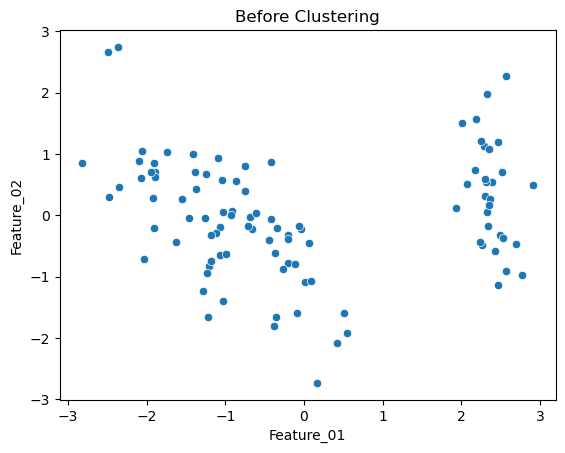

In [45]:
sns.scatterplot(x = x_train[:,0], y = x_train[:,1])
plt.xlabel("Feature_01")
plt.ylabel("Feature_02")
plt.title("Before Clustering")

Text(0, 0.5, 'Eucledian Distance')

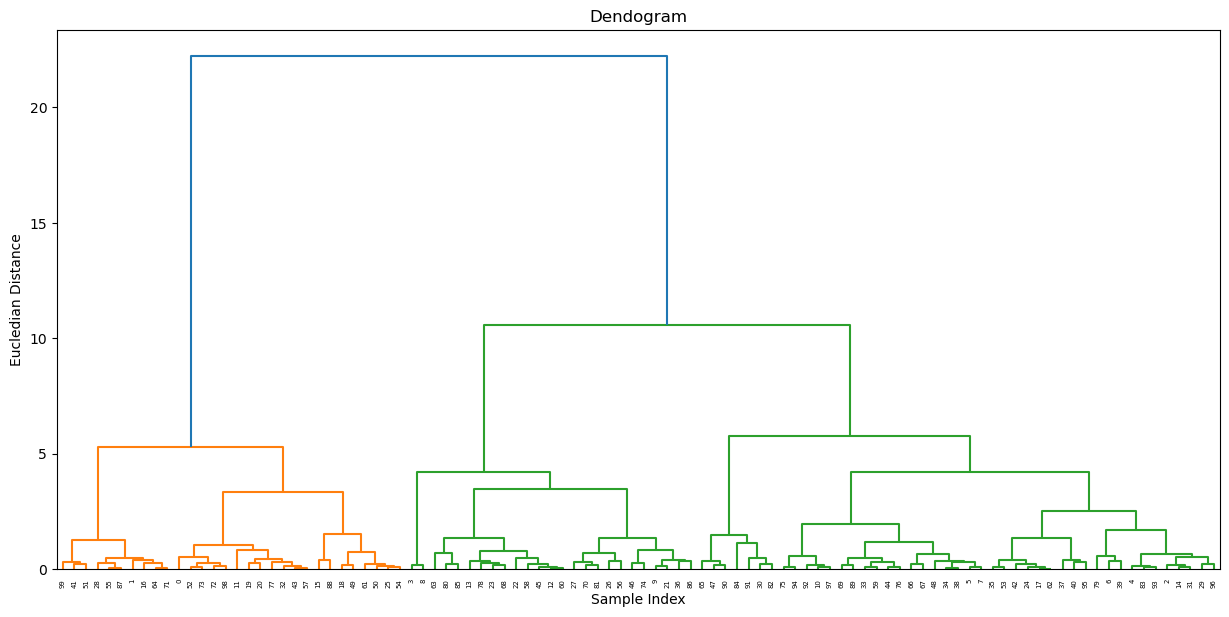

In [47]:
plt.figure(figsize = (15, 7))
plt.title("Dendogram")
sc.dendrogram(sc.linkage(x_train, method = "ward"))
plt.xlabel("Sample Index")
plt.ylabel("Eucledian Distance")

### Step-05: Import AgglomerativeClustering from sklearn.cluster

In [49]:
from sklearn.cluster import AgglomerativeClustering

In [50]:
agglomerative_clustering = AgglomerativeClustering(n_clusters = 2)

In [51]:
agglomerative_clustering

AgglomerativeClustering()

In [52]:
agglomerative_clustering.fit(x_train)

AgglomerativeClustering()

In [54]:
x_train_labels = agglomerative_clustering.labels_

In [55]:
x_train_labels

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1])

In [56]:
agglomerative_clustering.fit(x_test)

AgglomerativeClustering()

In [57]:
x_test_labels = agglomerative_clustering.labels_

In [58]:
x_test_labels

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1])

Text(0.5, 1.0, 'After Clustering (X_train Data)')

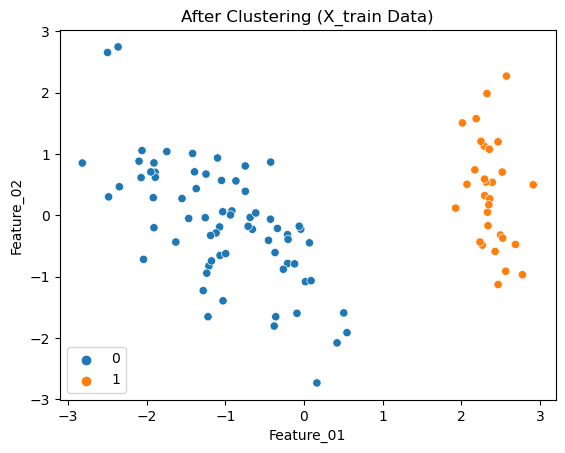

In [64]:
sns.scatterplot(x = x_train[:,0], y = x_train[:,1], hue = x_train_labels)
plt.xlabel("Feature_01")
plt.ylabel("Feature_02")
plt.title("After Clustering (X_train Data)")

Text(0.5, 1.0, 'After Clustering (X_test Data)')

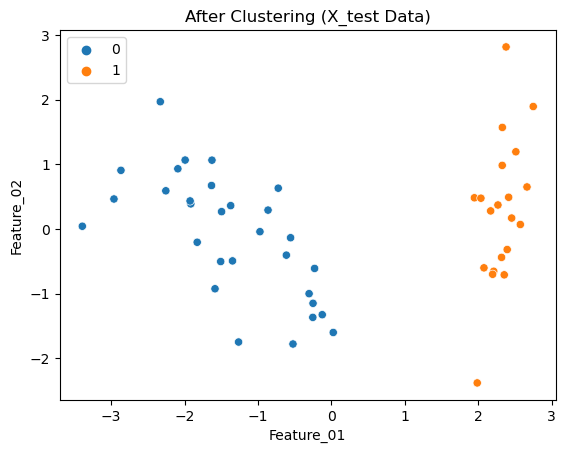

In [62]:
sns.scatterplot(x = x_test[:,0], y = x_test[:,1], hue = x_test_labels)
plt.xlabel("Feature_01")
plt.ylabel("Feature_02")
plt.title("After Clustering (X_test Data)")

### Step-06: Import silhoutte score from sklearn.metrics

In [66]:
from sklearn.metrics import silhouette_score

In [68]:
silhouette_coeffecients = []

for k in range(2, 11):
    agglomerative_clustering = AgglomerativeClustering(n_clusters = k, affinity = "euclidean")
    agglomerative_clustering.fit(x_train)
    x_train_labels = agglomerative_clustering.labels_
    accuracy = silhouette_score(x_train, x_train_labels)
    silhouette_coeffecients.append(accuracy)

In [69]:
silhouette_coeffecients

[0.6166731934393662,
 0.5017533299159951,
 0.47446851412758356,
 0.4251712826397319,
 0.41601441875990036,
 0.44265474399611404,
 0.45087196542186986,
 0.45697754910731503,
 0.4642207429473845]

Text(0.5, 1.0, 'Silhoutte Coefficients X No. of Clusters')

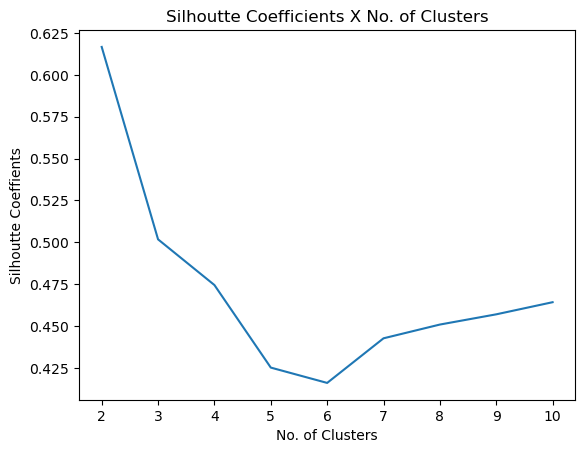

In [71]:
sns.lineplot(x = range(2,11), y = silhouette_coeffecients)
plt.xlabel("No. of Clusters")
plt.ylabel("Silhoutte Coeffients")
plt.title("Silhoutte Coefficients X No. of Clusters")